# 6. Hydro: Projections

## Load The Data

In [1]:
using Mera
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14");
gas  = gethydro(info, lmax=10, smallr=1e-5); 

[Mera]: 2020-05-24T20:33:33.654

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2020-04-10T17:50:37.149
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Npart:    5.091500e+05 
- Nstars:   5.066030e+05 
- Ndm:      2.547000e+03 
particle variables: (:vx, :vy, :vz, :mass, :birth)
-------------------------------------------------------
clumps:       

100%|███████████████████████████████████████████████████| Time: 0:03:28


Memory used for data table :409.54333782196045 MB
-------------------------------------------------------



In [2]:
gas.data

Table with 4879946 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

## Projection of Predefined Quantities

See the possible variables:

In [3]:
projection()

Predefined vars for projections:
------------------------------------------------
=====================[gas]:=====================
       -all the non derived hydro vars-
:cpu, :level, :rho, :cx, :cy, :cz, :vx, :vy, :vz, :p, var6,...
further possibilities: :rho, :density, :ρ
              -derived hydro vars-
:x, :y, :z
:sd or :Σ or :surfacedensity
:mass, :cellsize, :freefall_time
:cs, :mach, :jeanslength, :jeansnumber

==================[particles]:==================
        all the non derived  vars:
:cpu, :level, :id, :family, :tag 
:x, :y, :z, :vx, :vy, :vz, :mass, :birth, :metal....

              -derived particle vars-
:age

==============[gas or particles]:===============
:v, :ekin
squared => :vx2, :vy2, :vz2
velocity dispersion => σx, σy, σz, σ

related to a given center:
---------------------------
:vr_cylinder, vr_sphere (radial components)
:vϕ_cylinder, :vθ
squared => :vr_cylinder2, :vϕ_cylinder2
velocity dispersion => σr_cylinder, σϕ_cylinder 

2d maps (not projected):
:r_

## Projection of a Single Quantity in Different Directions (z,y,x)

Here we project the surface density in the z-direction of the data within a particular vertical range (domain=[0:1]) onto a grid corresponding to the maximum loaded level. 
Pass any object of `HydroDataType` (here: "gas") to the `projection`-function and select a variable by a Symbol (here: :sd = :surfacedensity = :Σ in Msol/pc^3)

In [4]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, zrange=[0.45,0.55])
proj_z = projection(gas, :Σ,  unit=:Msol_pc2, zrange=[0.45,0.55], verbose=false)
proj_z = projection(gas, :surfacedensity, unit=:Msol_pc2, zrange=[0.45,0.55], verbose=false)
proj_z = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], verbose=false) # The keyword "unit" (singular) can be omit if the following order is preserved: data-object, quantity, unit.
proj_x = projection(gas, :sd, :Msol_pc2, direction = :x, zrange=[0.45,0.55], verbose=false); # Project the surface density in x-direction

[Mera]: 2020-05-18T21:14:26.137

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 



100%|███████████████████████████████████████████████████| Time: 0:00:04
100%|███████████████████████████████████████████████████| Time: 0:00:02
100%|███████████████████████████████████████████████████| Time: 0:00:02
100%|███████████████████████████████████████████████████| Time: 0:00:02
100%|███████████████████████████████████████████████████| Time: 0:00:02


### Select a Range Related to a Center
See also in the documentation for: load data by selection

In [5]:
cv = (gas.boxlen / 2.) * gas.scale.kpc # provide the box-center in kpc
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[cv,cv,cv], range_unit=:kpc);

[Mera]: 2020-05-18T21:14:43.555

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 



Use the short notation for the box center :bc or :boxcenter for all dimensions (x,y,z):

In [6]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:boxcenter], range_unit=:kpc);

[Mera]: 2020-05-18T21:14:47.27

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 



In [7]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc], range_unit=:kpc);

[Mera]: 2020-05-18T21:14:48.996

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 



Use the box center notation for individual dimensions, here x,z:

In [8]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc, 24., :bc], range_unit=:kpc);

[Mera]: 2020-05-18T21:14:52.49

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 



### Get Multiple Quantities

Get several quantities with one function call by passing an array containing the selected variables (at least one entry). The keyword name for the units is now in plural.

In [9]:
proj1_x = projection(gas, [:sd], units=[:Msol_pc2], 
                        direction = :x, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-05-18T21:14:54.284

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 



Pass an array containing several quantities to process and their corresponding units:

In [10]:
proj1_z = projection(gas, [:sd, :vx], units=[:Msol_pc2, :km_s], 
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-05-18T21:14:56.117

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd, :vx) 



100%|███████████████████████████████████████████████████| Time: 0:00:07


The function can be called without any keywords by preserving the following order: dataobject, variables, units

In [11]:
proj1_z = projection(gas, [:sd , :vx], [:Msol_pc2, :km_s], 
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-05-18T21:15:04

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd, :vx) 



100%|███████████████████████████████████████████████████| Time: 0:00:02


If all selected variables should be of the same unit use the following arguments: dataobject, array of quantities, unit (no array needed)

In [12]:
projvel_z = projection(gas, [:vx, :vy, :vz], :km_s, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-05-18T21:15:06.22

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:vx, :vy, :vz, :sd) 



100%|███████████████████████████████████████████████████| Time: 0:00:02


## Function Output

List the fields of the assigned object:

In [13]:
propertynames(proj1_z)

(:maps, :maps_unit, :maps_lmax, :maps_mode, :lmax_projected, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :boxlen, :smallr, :smallc, :scale, :info)

The projected 2D maps are stored in a dictionary:

In [14]:
proj1_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 2 entries:
  :sd => [2.42108 2.42108 … 3.06809 3.06809; 2.42108 2.42108 … 3.06809 3.06809;…
  :vx => [48.3311 48.3311 … 35.0161 35.0161; 48.3311 48.3311 … 35.0161 35.0161;…

The maps can be accessed by giving the name of the dictionary:

In [15]:
proj1_z.maps[:sd]

428×86 Array{Float64,2}:
 2.42108  2.42108  2.42108  2.76423  …  3.80613  3.06809  3.06809  3.06809
 2.42108  2.42108  2.42108  2.76423     3.80613  3.06809  3.06809  3.06809
 2.43323  2.43323  2.43323  2.83905     3.77978  3.04769  3.04769  3.04769
 2.43323  2.43323  2.43323  2.83905     3.77978  3.04769  3.04769  3.04769
 2.43323  2.43323  2.43323  2.83612     3.77978  3.04769  3.04769  3.04769
 2.43323  2.43323  2.43323  2.83612  …  3.77978  3.04769  3.04769  3.04769
 2.61724  2.61724  2.61724  2.78421     3.38093  2.59978  2.59978  2.59978
 2.61724  2.61724  2.61724  2.78421     3.38093  2.59978  2.59978  2.59978
 2.61724  2.61724  2.61724  2.78048     3.38093  2.59978  2.59978  2.59978
 2.61724  2.61724  2.61724  2.78048     3.38093  2.59978  2.59978  2.59978
 2.65948  2.65948  2.65948  2.92033  …  3.26695  2.56391  2.56391  2.56391
 2.65948  2.65948  2.65948  2.92033     3.26695  2.56391  2.56391  2.56391
 2.65948  2.65948  2.65948  2.9154      3.26695  2.56391  2.56391  2.56391


The units of the maps are stored in:

In [16]:
proj1_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 2 entries:
  :sd => :Msol_pc2
  :vx => :km_s

Projections on a different grid size (see subject below):

In [17]:
proj1_z.maps_lmax

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 0 entries

The following fields are helpful for further calculations or plots.

In [18]:
proj1_z.ranges # normalized to the domain=[0:1]

6-element Array{Float64,1}:
 0.29166666666647767
 0.7083333333328743 
 0.29166666666647767
 0.7083333333328743 
 0.4583333333330363 
 0.5416666666663156 

In [19]:
proj1_z.extent # ranges in code units

4-element Array{Float64,1}:
 13.96875 
 34.03125 
 21.984375
 26.015625

In [20]:
proj1_z.cextent # ranges in code units relative to a given center (by default: box center)

4-element Array{Float64,1}:
 -10.031250000015556 
  10.031249999984444 
  -2.0156250000155556
   2.0156249999844444

In [21]:
proj1_z.ratio # the ratio between the two ranges

4.976744186046512

## Plot Maps with Python

In [4]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    direction = :x);

100%|███████████████████████████████████████████████████| Time: 0:00:04
100%|███████████████████████████████████████████████████| Time: 0:00:02


Python functions can be directly called in Julia, which gives the opportunity, e.g. to use the Matplotlib library.

In [5]:
using PyPlot
using ColorSchemes
cmap = ColorMap(ColorSchemes.lajolla.colors) # See http://www.fabiocrameri.ch/colourmaps.php
cmap2 = ColorMap(ColorSchemes.roma.colors)

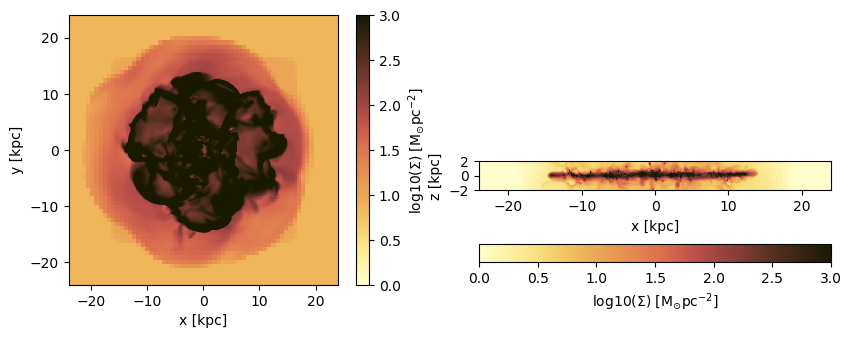

In [7]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Project a specific spatial range and plot the axes of the map relative to the box-center (given by keyword: data_center):

In [25]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc, 
                    direction = :x);

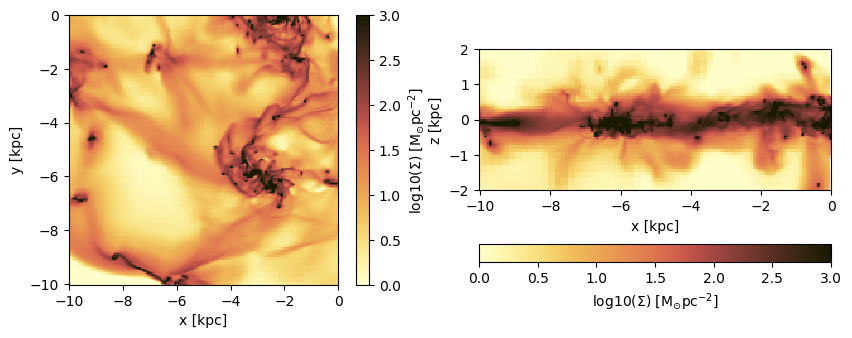

In [26]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Plot the axes of the map relative to the map-center (given by keyword: data_center):

In [27]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc, 
                    direction = :x);

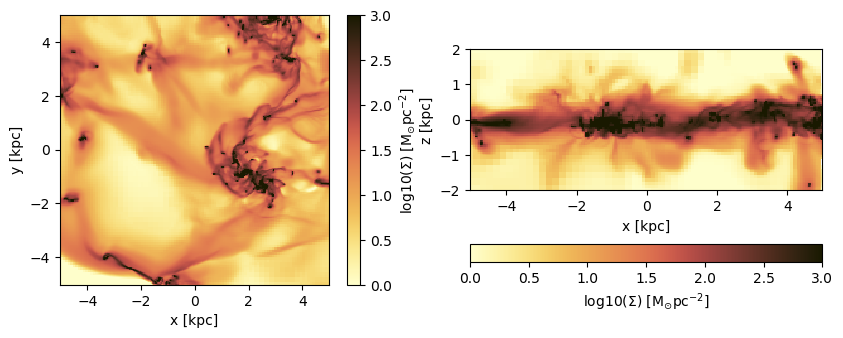

In [28]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

## Projections of Derived Kinematic Data

#### Use quantities in cartesian coordinates:

Project the following derived data
(mass weighted by default): The absolute value of the velocity :v, the velocity dispersion :σ in different directions. The Julia language supports Unicode characters and can be inserted by e.g. "\sigma + tab-key" leading to: **σ**.

In [29]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz], :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[24.,24.,24.], range_unit=:kpc);

[Mera]: 2020-05-18T21:16:11.273

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :sd) 



100%|███████████████████████████████████████████████████| Time: 0:00:11


For the velocity dispersion additional maps are created to created the mass-weighted quantity:
E. g.: σx = sqrt( <vx^2> - < vx >^2 )

In [30]:
proj_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 13 entries:
  :sd  => [0.000525384 0.000525384 … 0.000463458 0.000334485; 0.000525384 0.000…
  :v   => [87.2263 87.2263 … 74.2532 66.7684; 87.2263 87.2263 … 74.2532 66.7684…
  :v2  => [1.96323 1.96323 … 1.55066 1.30759; 1.96323 1.96323 … 1.55066 1.30759…
  :vx  => [0.956079 0.956079 … -0.560013 -0.307302; 0.956079 0.956079 … -0.5600…
  :vx2 => [0.97878 0.97878 … 0.890713 0.620727; 0.97878 0.97878 … 0.890713 0.62…
  :vy  => [0.356529 0.356529 … -0.0411814 -0.0443317; 0.356529 0.356529 … -0.04…
  :vy2 => [0.264853 0.264853 … 0.152368 0.15076; 0.264853 0.264853 … 0.152368 0…
  :vz  => [-0.799307 -0.799307 … -0.296515 -0.193888; -0.799307 -0.799307 … -0.…
  :vz2 => [0.719601 0.719601 … 0.50758 0.536101; 0.719601 0.719601 … 0.50758 0.…
  :σ   => [28.874 28.874 … 33.9777 34.1287; 28.874 28.874 … 33.9777 34.1287; … …
  :σx  => [16.6789 16.6789 … 49.8155 47.5723; 16.6789 16.6789 … 49.8155 47.5723…
  :σy  => [24.3371 24.3371 … 2

In [31]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 13 entries:
  :sd  => :standard
  :v   => :km_s
  :v2  => :standard
  :vx  => :standard
  :vx2 => :standard
  :vy  => :standard
  :vy2 => :standard
  :vz  => :standard
  :vz2 => :standard
  :σ   => :km_s
  :σx  => :km_s
  :σy  => :km_s
  :σz  => :km_s

In [32]:
usedmemory(proj_z);

Memory used: 18.436 MB


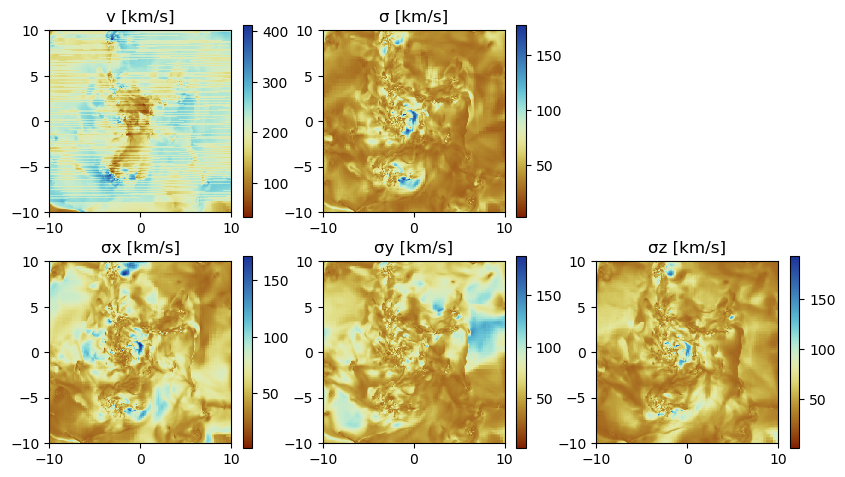

In [33]:
figure(figsize=(10, 5.5))

subplot(2, 3, 1)
title("v [km/s]")
imshow( (permutedims(proj_z.maps[:v])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 2)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(2, 3, 4)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx])   ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 5)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 6)
title("σz [km/s]")
imshow( permutedims(proj_z.maps[:σz]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();


#### Use quantities in cylindrical coordinates:
#### Face-on disc (z-direction)
For the cylindrical or spherical components of a quantity, the center of the coordinate system is used (keywords: data_center = center default) and can be given with the keyword "data_center" and its units with "data_center_unit". Additionally, the quantities that are based on cartesian coordinates can be given.

In [34]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder],                    
                    units=[:km_s,:km_s,:km_s, :km_s, :standard, :kpc, :km_s, :km_s, :km_s, :km_s], 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    data_center=[24.,24.,24.],
                    data_center_unit=:kpc); 

[Mera]: 2020-05-18T21:16:24.97

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 



100%|███████████████████████████████████████████████████| Time: 0:00:18


In [35]:
proj_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => [14.0758 14.0427 … 14.1201 14.1534; 14.0427 14.0096 … 14.087…
  :sd           => [0.000525384 0.000525384 … 0.000463458 0.000334485; 0.000525…
  :v            => [87.2263 87.2263 … 74.2532 66.7684; 87.2263 87.2263 … 74.253…
  :v2           => [1.96323 1.96323 … 1.55066 1.30759; 1.96323 1.96323 … 1.5506…
  :vr_cylinder  => [-60.864 -60.864 … 23.8666 12.034; -60.864 -60.864 … 23.8666…
  :vr_cylinder2 => [1.05049 1.05049 … 0.620751 0.537682; 1.05049 1.05049 … 0.62…
  :vx           => [0.956079 0.956079 … -0.560013 -0.307302; 0.956079 0.956079 …
  :vx2          => [0.97878 0.97878 … 0.890713 0.620727; 0.97878 0.97878 … 0.89…
  :vy           => [0.356529 0.356529 … -0.0411814 -0.0443317; 0.356529 0.35652…
  :vy2          => [0.264853 0.264853 … 0.152368 0.15076; 0.264853 0.264853 … 0…
  :vϕ_cylinder  => [27.8004 27.8004 … 32.2947 22.3274; 27.8004 27.8004 … 32.294…
  :vϕ_cylinder2 => [0.193141 0

In [36]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => :kpc
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σϕ_cylinder  => :km_s
  :ϕ            => :radian

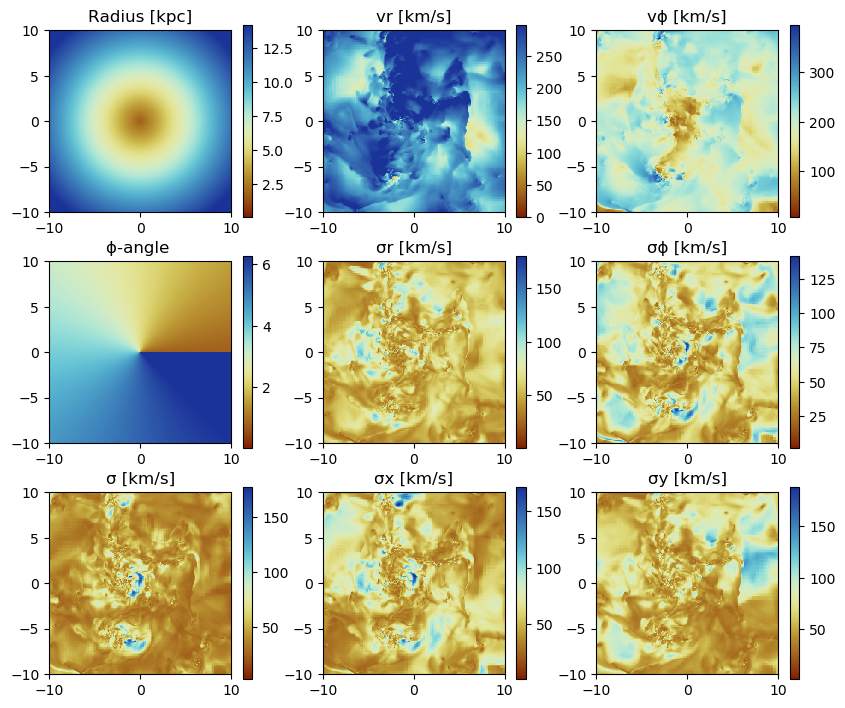

In [37]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("Radius [kpc]")
imshow( permutedims(proj_z.maps[:r_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent, vmin=0.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("ϕ-angle ")
imshow( permutedims(proj_z.maps[:ϕ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps[:σr_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps[:σϕ_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( permutedims(proj_z.maps[:σ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps[:σx] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

## Project on a Coarser Grid

The default is the projection on the maximum loaded grid level (always provided in the output). Choose a smaller level with the keyword `lmax` to project on a coarser grid in addition. Higher-resolution data is averaged within each coarser grid-cell (default: mass-weighted). By default, the data is assumed to be in the center of the simulation box.

In [38]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    lmax=8); 

[Mera]: 2020-05-18T21:16:47.422

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 



100%|███████████████████████████████████████████████████| Time: 0:00:09



remap from:
level 10 => 8
cellsize 46.88 [pc] => 187.5 [pc]
pixels (428, 428) => (107, 107)


The projection onto the maximum loaded grid is always provided:

In [39]:
proj_z.maps_lmax

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => [0.000525384 0.000545269 … 0.000475553 0.000334485; 0.000532…
  :v            => [87.2263 87.9593 … 92.8039 66.7684; 87.6693 88.4564 … 107.86…
  :v2           => [1.96323 1.99698 … 2.5318 1.30759; 1.99905 2.02766 … 3.40003…
  :vr_cylinder  => [-60.864 -55.8796 … 31.244 12.034; -60.3111 -53.8488 … 25.68…
  :vr_cylinder2 => [1.05049 0.991954 … 0.776327 0.537682; 1.06115 0.974359 … 0.…
  :vx           => [0.956079 0.946583 … -0.829723 -0.307302; 0.971469 0.958439 …
  :vx2          => [0.97878 0.965453 … 1.64102 0.620727; 1.01514 0.991003 … 1.9…
  :vy           => [0.356529 0.253398 … -0.15861 -0.0443317; 0.333856 0.202877 …
  :vy2          => [0.264853 0.301647 … 0.202579 0.15076; 0.275192 0.325326 … 0…
  :vz           => [-0.799307 -0.80575 … -0.226466 -0.193888; -0.788791 -0.7918…
  :vz2          => [0.719601 0.729882 … 0.688197 0.536101; 0.708711 0.711334 … …
  :vϕ_cylinder  => [27.8004 31

In [40]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vz           => :standard
  :vz2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σz           => :km_s
  :σϕ_cylinder  => :km_s

The projection onto a coarser grid (fieldname: `maps_lmax`) is stored in a dictionary into the field `maps_lmax`:

In [41]:
proj_z.lmax_projected

8

In [42]:
proj_z.maps_lmax

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => [0.000525384 0.000545269 … 0.000475553 0.000334485; 0.000532…
  :v            => [87.2263 87.9593 … 92.8039 66.7684; 87.6693 88.4564 … 107.86…
  :v2           => [1.96323 1.99698 … 2.5318 1.30759; 1.99905 2.02766 … 3.40003…
  :vr_cylinder  => [-60.864 -55.8796 … 31.244 12.034; -60.3111 -53.8488 … 25.68…
  :vr_cylinder2 => [1.05049 0.991954 … 0.776327 0.537682; 1.06115 0.974359 … 0.…
  :vx           => [0.956079 0.946583 … -0.829723 -0.307302; 0.971469 0.958439 …
  :vx2          => [0.97878 0.965453 … 1.64102 0.620727; 1.01514 0.991003 … 1.9…
  :vy           => [0.356529 0.253398 … -0.15861 -0.0443317; 0.333856 0.202877 …
  :vy2          => [0.264853 0.301647 … 0.202579 0.15076; 0.275192 0.325326 … 0…
  :vz           => [-0.799307 -0.80575 … -0.226466 -0.193888; -0.788791 -0.7918…
  :vz2          => [0.719601 0.729882 … 0.688197 0.536101; 0.708711 0.711334 … …
  :vϕ_cylinder  => [27.8004 31

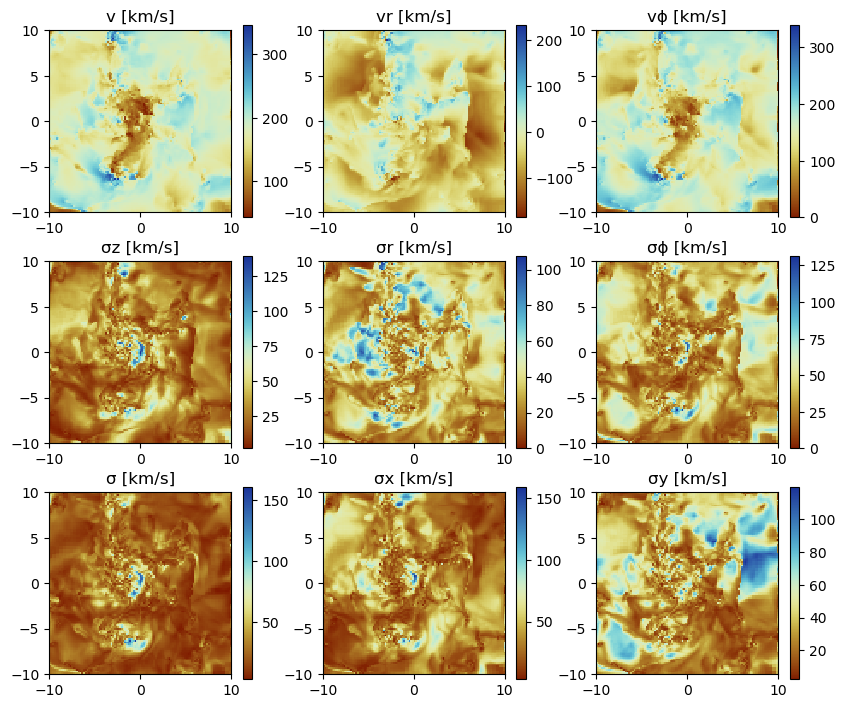

In [43]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("v [km/s]")
imshow( permutedims(proj_z.maps_lmax[:v]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps_lmax[:vr_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps_lmax[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("σz [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σz] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σr_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σϕ_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σx]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps_lmax[:σy] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

## Remap a Projected Data onto a Coarser Grid

Pass the object with the projected data to the function `remap` and the level of the coarser grid:

In [44]:
proj_zlmax = remap(proj_z, 6, weighting=:mass);


remap from:
level 10 => 6
cellsize 46.88 [pc] => 750.0 [pc]
pixels (428, 428) => (27, 27)


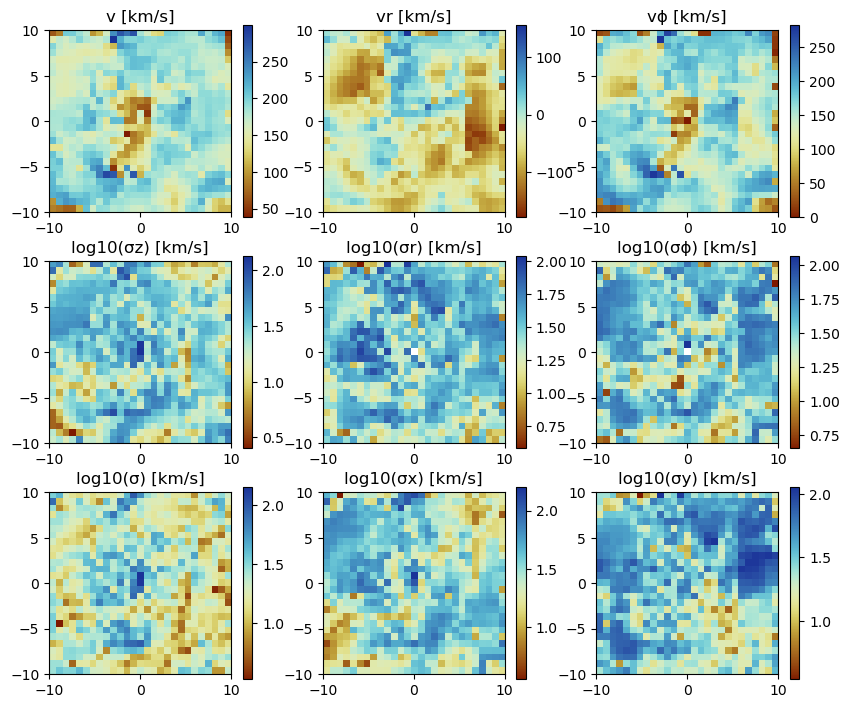

In [45]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("v [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:v]  ), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:vr_cylinder] ), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 4)
title("log10(σz) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σz]) ), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 5)
title("log10(σr) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σr_cylinder]  )), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 6)
title("log10(σϕ) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σϕ_cylinder] )), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 7)
title("log10(σ) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σ]) ), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 8)
title("log10(σx) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σx]  )), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 9)
title("log10(σy) [km/s]")
imshow( log10.(permutedims(proj_zlmax.maps_lmax[:σy] )), cmap=cmap2, origin="lower", extent=proj_zlmax.cextent)
colorbar();

## Projection of Thermal Data

The the sound speed is calculated from the loaded adiabatic index (from the hydro files):

In [46]:
proj_z = projection(gas, :cs, :km_s, zrange=[0.45,0.55], xrange=[0.3, 0.6], yrange=[0.3, 0.6])
proj_x = projection(gas, :cs, :km_s, zrange=[0.45,0.55], xrange=[0.3, 0.6], yrange=[0.3, 0.6], direction=:x);

[Mera]: 2020-05-18T21:17:01.02

domain:
xmin::xmax: 0.3 :: 0.6  	==> 14.4 [kpc] :: 28.8 [kpc]
ymin::ymax: 0.3 :: 0.6  	==> 14.4 [kpc] :: 28.8 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:cs, :sd) 

[Mera]: 2020-05-18T21:17:02.767

domain:
xmin::xmax: 0.3 :: 0.6  	==> 14.4 [kpc] :: 28.8 [kpc]
ymin::ymax: 0.3 :: 0.6  	==> 14.4 [kpc] :: 28.8 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:cs, :sd) 



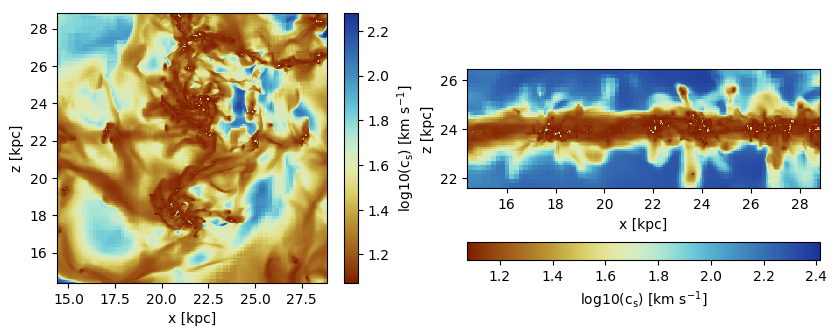

In [47]:
figure(figsize=(10, 3.5))

subplot(1, 2, 1)
im = imshow( log10.(permutedims(proj_z.maps[:cs])   ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(c_s) \ [km \ s^{-1}]}")


subplot(1, 2, 2)
im = imshow( log10.(permutedims(proj_x.maps[:cs]) ), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(c_s) \ [km \ s^{-1}]}",orientation="horizontal", pad=0.2);


Change the adiabatic index in the field `gas.info.gamma` to use a different value in the projection calculation.

## Projection of Masked Data

Mask higher densities by creating a Bool-array where the lower density cells correspond to false entries:

In [48]:
density = 4e-3 / gas.scale.Msol_pc3
mask = map(row->row.rho < density, gas.data);

Pass the mask to the projection function:

In [49]:
proj_z = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], mask=mask)
proj_x = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], mask=mask, direction=:x);

[Mera]: 2020-05-18T21:17:07.353

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 

:mask provided by function



100%|███████████████████████████████████████████████████| Time: 0:00:06


[Mera]: 2020-05-18T21:17:18.908

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 

:mask provided by function



100%|███████████████████████████████████████████████████| Time: 0:00:02


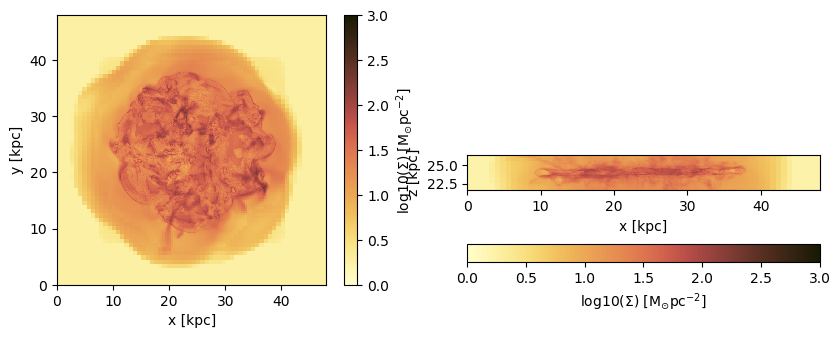

In [50]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);